# Prepare Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
df = pd.read_excel('data-pengetahuan-3.xlsx')
# df = pd.read_excel('pengetahuan2.xlsx')
df

,Judul,Tema
0,Algoritma Genetika Ganda untuk Capacitated Veh...,Data Sains
1,ANALISIS ASOSIASI PILIHAN PROGRAM STUDI PENDAF...,Data Sains
2,Analisis Big Data untuk Identifikasi Pola Perj...,Data Sains
3,Analisis Big Data untuk Meningkatkan Kinerja S...,Data Sains
4,Analisis Big Data untuk Optimalisasi Kampanye ...,Data Sains
...,...,...
991,Prinsip Dasar Desain UI/UX untuk Pemula,UI/UX
992,Prinsip Desain UX untuk Website yang Mudah Dia...,UI/UX
993,Studi UX pada Aplikasi Pendidikan Interaktif,UI/UX
994,Tren Desain UI/UX yang Akan Menguasai Tahun Ini,UI/UX


# Data Understanding

In [ ]:
print("data shape: ", df.shape)

data shape:  (996, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Judul   996 non-null    object
 1   Tema    996 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [ ]:
df.describe()

,Judul,Tema
count,996,996
unique,970,4
top,Analisis Survival untuk Studi Durasi Pengobata...,Programmer
freq,2,419


In [ ]:
df.Judul.value_counts()

Judul
Analisis Survival untuk Studi Durasi Pengobatan Penyakit dengan Teknik Data Science                      2
Analisis Pola Konsumsi Energi Rumah Tangga Menggunakan Algoritma Clustering                              2
Rancang Bangun Sistem Monitoring Listrik Prabayar dengan Menggunakan Arduino Uno                         2
Rancang Bangun Prototipe Elevator Menggunakan Microcontroller Arduino ATMEGA 328P                        2
Rancang bangun magnetic door lock menggunakan keypad dan solenoid berbasis mikrokontroler arduino uno    2
                                                                                                        ..
Penerapan Algoritma Fuzzy dalam Pengambilan Keputusan Sistem Pakar                                       1
Penerapan Algoritma Genetika dalam Optimisasi Penjadwalan Tugas pada Cloud Computing                     1
Penerapan Machine Learning dalam Pengoptimalan Kode Program                                              1
Penerapan Metode Agile dalam Pe

In [ ]:
df.Tema.value_counts()

Tema
Programmer       419
Sistem Cerdas    227
Data Sains       202
UI/UX            148
Name: count, dtype: int64

<Axes: xlabel='Tema', ylabel='Count'>

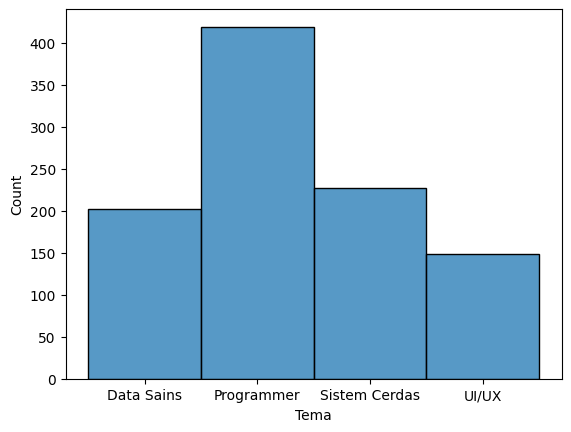

In [ ]:
sns.histplot(df['Tema'])

## Cleaning Data

In [ ]:
# cek data yang kosong
df.isnull().sum()

Judul    0
Tema     0
dtype: int64

In [ ]:
# cek data double
df.duplicated(subset=['Judul', 'Tema'])

0      False
1      False
2      False
3      False
4      False
       ...  
991    False
992    False
993    False
994    False
995    False
Length: 996, dtype: bool

## Explorarity Data Analysis

<ipython-input-11-cb1a923b870a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Tema", data=df, palette="flare")


Tema
Programmer       419
Sistem Cerdas    227
Data Sains       202
UI/UX            148
Name: count, dtype: int64 



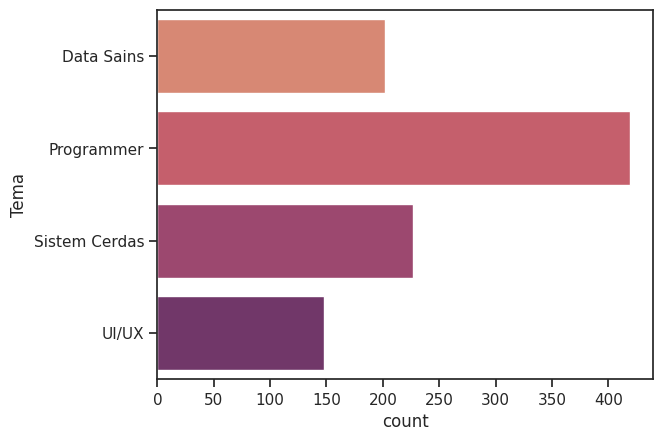

In [ ]:
sns.set_theme(style="ticks")
sns.countplot(y="Tema", data=df, palette="flare")
plt.ylabel = ("jenis tema")
plt.xlabel = ("total / jumlah")

print(df.Tema.value_counts(), "\n")
plt.show()

# Data Preparation

## Data Preprocessing

In [ ]:
df.head()

,Judul,Tema
0,Algoritma Genetika Ganda untuk Capacitated Veh...,Data Sains
1,ANALISIS ASOSIASI PILIHAN PROGRAM STUDI PENDAF...,Data Sains
2,Analisis Big Data untuk Identifikasi Pola Perj...,Data Sains
3,Analisis Big Data untuk Meningkatkan Kinerja S...,Data Sains
4,Analisis Big Data untuk Optimalisasi Kampanye ...,Data Sains


In [ ]:
# ubah data ke lower case
df['Judul'] = df['Judul'].str.lower()
df['Tema'] = df['Tema'].str.lower()

df

,Judul,Tema
0,algoritma genetika ganda untuk capacitated veh...,data sains
1,analisis asosiasi pilihan program studi pendaf...,data sains
2,analisis big data untuk identifikasi pola perj...,data sains
3,analisis big data untuk meningkatkan kinerja s...,data sains
4,analisis big data untuk optimalisasi kampanye ...,data sains
...,...,...
991,prinsip dasar desain ui/ux untuk pemula,ui/ux
992,prinsip desain ux untuk website yang mudah dia...,ui/ux
993,studi ux pada aplikasi pendidikan interaktif,ui/ux
994,tren desain ui/ux yang akan menguasai tahun ini,ui/ux


In [ ]:
import string
import re

def remove_special(text)-> string:
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z]+.-)|(\w+:\/\/\S+.-)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

df['Judul'] = df['Judul'].apply(remove_special)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Judul'] = df['Judul'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Judul'] = df['Judul'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Judul'] = df['Judul'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Judul'] = df['Judul'].apply(remove_singl_char)

df

,Judul,Tema
0,algoritma genetika ganda untuk capacitated veh...,data sains
1,analisis asosiasi pilihan program studi pendaf...,data sains
2,analisis big data untuk identifikasi pola perj...,data sains
3,analisis big data untuk meningkatkan kinerja s...,data sains
4,analisis big data untuk optimalisasi kampanye ...,data sains
...,...,...
991,prinsip dasar desain uiux untuk pemula,ui/ux
992,prinsip desain ux untuk website yang mudah dia...,ui/ux
993,studi ux pada aplikasi pendidikan interaktif,ui/ux
994,tren desain uiux yang akan menguasai tahun ini,ui/ux


## Data Dikelola

In [ ]:
from sklearn.preprocessing import LabelEncoder

# mengubah nilai baris Tema menjadi integer buat bobot acuan
label_encode = LabelEncoder()
df['tema_bobot'] = label_encode.fit_transform(df['Tema'])

df

,Judul,Tema,tema_bobot
0,algoritma genetika ganda untuk capacitated veh...,data sains,0
1,analisis asosiasi pilihan program studi pendaf...,data sains,0
2,analisis big data untuk identifikasi pola perj...,data sains,0
3,analisis big data untuk meningkatkan kinerja s...,data sains,0
4,analisis big data untuk optimalisasi kampanye ...,data sains,0
...,...,...,...
991,prinsip dasar desain uiux untuk pemula,ui/ux,3
992,prinsip desain ux untuk website yang mudah dia...,ui/ux,3
993,studi ux pada aplikasi pendidikan interaktif,ui/ux,3
994,tren desain uiux yang akan menguasai tahun ini,ui/ux,3


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['judul_token'] = df['Judul'].apply(word_tokenize_wrapper)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Judul,Tema,tema_bobot,judul_token
0,algoritma genetika ganda untuk capacitated veh...,data sains,0,"[algoritma, genetika, ganda, untuk, capacitate..."
1,analisis asosiasi pilihan program studi pendaf...,data sains,0,"[analisis, asosiasi, pilihan, program, studi, ..."
2,analisis big data untuk identifikasi pola perj...,data sains,0,"[analisis, big, data, untuk, identifikasi, pol..."
3,analisis big data untuk meningkatkan kinerja s...,data sains,0,"[analisis, big, data, untuk, meningkatkan, kin..."
4,analisis big data untuk optimalisasi kampanye ...,data sains,0,"[analisis, big, data, untuk, optimalisasi, kam..."


pada stopword, cara pengecekannya per kata, sehingga judul dipisah-pisah. alasannya agar lebih akurat dalam penggunaan stopword per kata

In [ ]:
# NLTK Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
txt_stopword = pd.read_csv("stopwordbahasa.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['judul_tokens_stopwords'] = df['judul_token'].apply(stopwords_removal)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Judul,Tema,tema_bobot,judul_token,judul_tokens_stopwords
0,algoritma genetika ganda untuk capacitated veh...,data sains,0,"[algoritma, genetika, ganda, untuk, capacitate...","[algoritma, genetika, ganda, capacitated, vehi..."
1,analisis asosiasi pilihan program studi pendaf...,data sains,0,"[analisis, asosiasi, pilihan, program, studi, ...","[analisis, asosiasi, pilihan, program, studi, ..."
2,analisis big data untuk identifikasi pola perj...,data sains,0,"[analisis, big, data, untuk, identifikasi, pol...","[analisis, big, data, identifikasi, pola, perj..."
3,analisis big data untuk meningkatkan kinerja s...,data sains,0,"[analisis, big, data, untuk, meningkatkan, kin...","[analisis, big, data, meningkatkan, kinerja, s..."
4,analisis big data untuk optimalisasi kampanye ...,data sains,0,"[analisis, big, data, untuk, optimalisasi, kam...","[analisis, big, data, optimalisasi, kampanye, ..."


In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# memasukan kata ke dict untuk setiap judul kata
kata_dict = {}
for juduls in df['judul_tokens_stopwords']:
    for kata in juduls:
        # mencegah kata double
        if kata not in kata_dict:
            kata_dict[kata] = ' '

for kata in kata_dict:
    kata_dict[kata] = stemmer.stem(kata)
    # print(kata,":" ,kata_dict[kata])

# implementasi ke dataset
def get_stemmed_kata(document):
    return [kata_dict[kata] for kata in document]

df['judul_tokens_stemmed'] = df['judul_tokens_stopwords'].apply(get_stemmed_kata)
df.head()

,Judul,Tema,tema_bobot,judul_token,judul_tokens_stopwords,judul_tokens_stemmed
0,algoritma genetika ganda untuk capacitated veh...,data sains,0,"[algoritma, genetika, ganda, untuk, capacitate...","[algoritma, genetika, ganda, capacitated, vehi...","[algoritma, genetika, ganda, capacitated, vehi..."
1,analisis asosiasi pilihan program studi pendaf...,data sains,0,"[analisis, asosiasi, pilihan, program, studi, ...","[analisis, asosiasi, pilihan, program, studi, ...","[analisis, asosiasi, pilih, program, studi, da..."
2,analisis big data untuk identifikasi pola perj...,data sains,0,"[analisis, big, data, untuk, identifikasi, pol...","[analisis, big, data, identifikasi, pola, perj...","[analisis, big, data, identifikasi, pola, jala..."
3,analisis big data untuk meningkatkan kinerja s...,data sains,0,"[analisis, big, data, untuk, meningkatkan, kin...","[analisis, big, data, meningkatkan, kinerja, s...","[analisis, big, data, tingkat, kerja, strategi..."
4,analisis big data untuk optimalisasi kampanye ...,data sains,0,"[analisis, big, data, untuk, optimalisasi, kam...","[analisis, big, data, optimalisasi, kampanye, ...","[analisis, big, data, optimalisasi, kampanye, ..."


In [ ]:
df['combined'] = df['judul_tokens_stemmed'].apply(lambda x: ' '.join(x))
df.head()

,Judul,Tema,tema_bobot,judul_token,judul_tokens_stopwords,judul_tokens_stemmed,combined
0,algoritma genetika ganda untuk capacitated veh...,data sains,0,"[algoritma, genetika, ganda, untuk, capacitate...","[algoritma, genetika, ganda, capacitated, vehi...","[algoritma, genetika, ganda, capacitated, vehi...",algoritma genetika ganda capacitated vehicle r...
1,analisis asosiasi pilihan program studi pendaf...,data sains,0,"[analisis, asosiasi, pilihan, program, studi, ...","[analisis, asosiasi, pilihan, program, studi, ...","[analisis, asosiasi, pilih, program, studi, da...",analisis asosiasi pilih program studi daftar u...
2,analisis big data untuk identifikasi pola perj...,data sains,0,"[analisis, big, data, untuk, identifikasi, pol...","[analisis, big, data, identifikasi, pola, perj...","[analisis, big, data, identifikasi, pola, jala...",analisis big data identifikasi pola jalan wisa...
3,analisis big data untuk meningkatkan kinerja s...,data sains,0,"[analisis, big, data, untuk, meningkatkan, kin...","[analisis, big, data, meningkatkan, kinerja, s...","[analisis, big, data, tingkat, kerja, strategi...",analisis big data tingkat kerja strategi pasar...
4,analisis big data untuk optimalisasi kampanye ...,data sains,0,"[analisis, big, data, untuk, optimalisasi, kam...","[analisis, big, data, optimalisasi, kampanye, ...","[analisis, big, data, optimalisasi, kampanye, ...",analisis big data optimalisasi kampanye pasar


In [ ]:
df.to_excel('cleaning-dataset.xlsx', index=False)

In [ ]:
# Contoh data teks dan label
juduls = df['combined']
juduls

0      algoritma genetika ganda capacitated vehicle r...
1      analisis asosiasi pilih program studi daftar u...
2      analisis big data identifikasi pola jalan wisa...
3      analisis big data tingkat kerja strategi pasar...
4          analisis big data optimalisasi kampanye pasar
                             ...                        
991                       prinsip dasar desain uiux mula
992                prinsip desain ux website mudah akses
993                   studi ux aplikasi didik interaktif
994                               tren desain uiux kuasa
995                            trik antarmuka guna pukau
Name: combined, Length: 996, dtype: object

In [ ]:
labels = df['tema_bobot']
print(labels.value_counts(), "\n")

tema = df[['Tema', 'tema_bobot']]
tema.head()

tema_bobot
1    419
2    227
0    202
3    148
Name: count, dtype: int64 



,Tema,tema_bobot
0,data sains,0
1,data sains,0
2,data sains,0
3,data sains,0
4,data sains,0


# Best Parameter

pencarian configurasi terbaik untuk training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = juduls
y = labels

# Define the range of test_size and random_state
test_size_range = np.arange(0.1, 0.50, 0.10)
random_state_range = np.arange(40, 101)
n_neighbors_range = np.arange(3, 9)
n_weight_range = ['uniform', 'distance']


history = []
best_accuracy = 0
best_test_size = 0
best_random_state = 0
best_n_neighbors = 0
best_n_weight = ''

In [ ]:
for test_size in test_size_range:
    for random_state in random_state_range:
        for n_neighbors in n_neighbors_range:
            for n_weight in n_weight_range:
                # Split the data
                X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

                # TF Idf
                vectorizer = TfidfVectorizer()
                X_train = vectorizer.fit_transform(X_train_texts)

                # Create and train the KNN classifier
                knn = KNeighborsClassifier(n_neighbors= n_neighbors, weights=n_weight, metric='cosine')
                knn.fit(X_train, y_train)

                X_test = vectorizer.transform(X_test_texts)
                # Predict on the test set
                y_pred = knn.predict(X_test)

                # Calculate the accuracy
                accuracy = accuracy_score(y_test, y_pred)

                # Append the results to the history
                history.append((n_neighbors, n_weight, test_size, random_state, accuracy))

                # Update the best parameters if the current accuracy is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_test_size = test_size
                    best_random_state = random_state
                    best_n_neighbors = n_neighbors
                    best_n_weight = n_weight


print(f"Best Test Size: {best_test_size}")
print(f"Best Random State: {best_random_state}")
print(f"Best Number of Neighbors: {best_n_neighbors}")
print(f"Best Weight: {best_n_weight}")
print(f"Best Accuracy: {best_accuracy}")

Best Test Size: 0.1
Best Random State: 53
Best Number of Neighbors: 7
Best Weight: distance
Best Accuracy: 0.91


In [ ]:
history_df = pd.DataFrame(history, columns=['n_neighbors', 'knn_weight', 'test_size', 'random_state', 'accuracy_score'])
history_df

,n_neighbors,knn_weight,test_size,random_state,accuracy_score
0,3,uniform,0.1,40,0.750000
1,3,distance,0.1,40,0.780000
2,4,uniform,0.1,40,0.790000
3,4,distance,0.1,40,0.750000
4,5,uniform,0.1,40,0.790000
...,...,...,...,...,...
2923,6,distance,0.4,100,0.764411
2924,7,uniform,0.4,100,0.749373
2925,7,distance,0.4,100,0.754386
2926,8,uniform,0.4,100,0.744361


In [ ]:
history_df.to_excel('history_pegujian.xlsx', index=False)

# Grafik Best Parameter

In [ ]:
!pip install altair

## Grafik Weight vs N_Neight

In [ ]:
import altair as alt

# Filter the dataframe to only include the best accuracy for each n_neighbors and metric
best_accuracy = history_df.groupby(['n_neighbors', 'knn_weight'])['accuracy_score'].max().reset_index()

# Create the line chart
chart = alt.Chart(best_accuracy).mark_line().encode(
    x='n_neighbors',
    y = alt.Y('accuracy_score:Q', scale=alt.Scale(domain=[0.6, 0.9])),
    color='knn_weight'
).properties(
    title='Best Accuracy vs. Number of Neighbors for Each Weight'
)

# Display the chart
chart

alt.Chart(...)

## Grafik Accuracy Metric vs Test_size

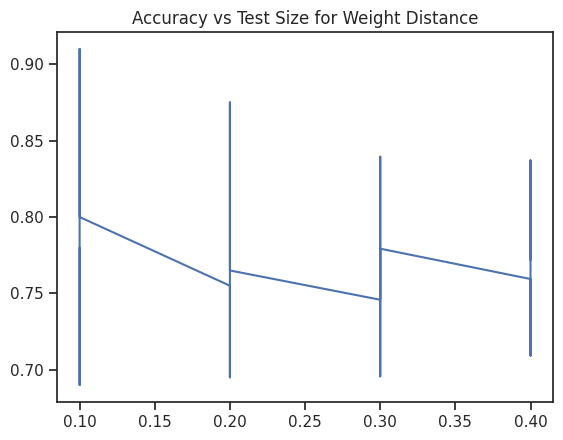

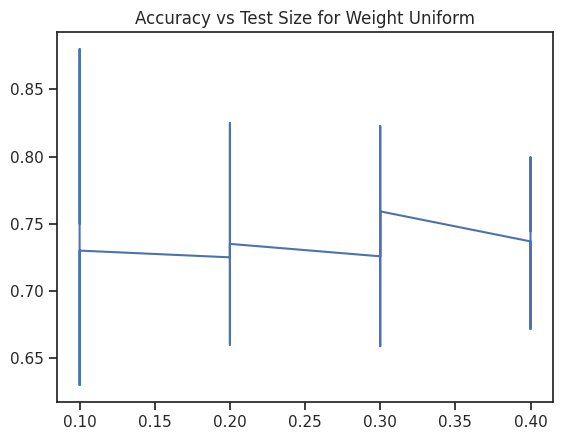

In [ ]:
# Filter data where metric is 'cosine'
filtered_df = history_df[history_df['knn_weight'] == 'distance']

# Create a line chart with accuracy on the y-axis and test_size on the x-axis
plt.plot(filtered_df['test_size'], filtered_df['accuracy_score'])

# Add labels and title
plt.title('Accuracy vs Test Size for Weight Distance')


# Show the plot
plt.show()

# Filter data where metric is 'cosine'
filtered_df = history_df[history_df['knn_weight'] == 'uniform']

# Create a line chart with accuracy on the y-axis and test_size on the x-axis
plt.plot(filtered_df['test_size'], filtered_df['accuracy_score'])

# Add labels and title
plt.title('Accuracy vs Test Size for Weight Uniform')


# Show the plot
plt.show()

# Modeling

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train_texts, X_test_texts, y_train, y_test = train_test_split(juduls, labels, test_size=0.1, random_state=53)

In [ ]:
X_train_texts.shape, X_test_texts.shape, y_train.shape, y_test.shape

((896,), (100,), (896,), (100,))

## TF - IDF

In [ ]:
# Membuat dan menyesuaikan TfidfVectorizer dengan data latih
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_texts)

## KNN

In [ ]:
# Melatih model KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7, weights="distance", metric="cosine")
# knn = KNeighborsClassifier(
knn.fit(X_train, y_train)
# knn.fit(X_resampled, y_resampled)

# Mengubah data uji menggunakan TfidfVectorizer yang telah di-fit
X_test = vectorizer.transform(X_test_texts)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

## Model Scores

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f} %\n" . format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix, "\n")
print("Classification Report:")
print(class_report)

Accuracy: 91.00 %

Confusion Matrix:
[[13  1  2  0]
 [ 1 41  0  0]
 [ 3  0 23  1]
 [ 0  1  0 14]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.96        42
           2       0.92      0.85      0.88        27
           3       0.93      0.93      0.93        15

    accuracy                           0.91       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100



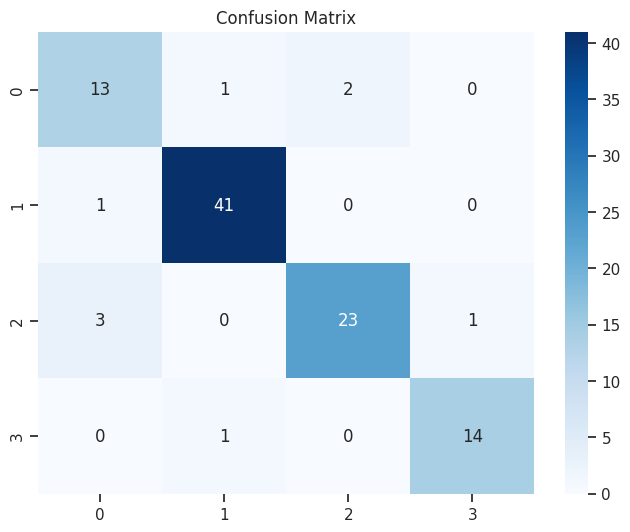

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.96        42
           2       0.92      0.85      0.88        27
           3       0.93      0.93      0.93        15

    accuracy                           0.91       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
# Create the report
report = classification_report(y_test, y_pred)

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print the report
print(report)


# Test Model

In [ ]:
# Fungsi untuk memprediksi teks baru
def predict_new_text(new_text, vectorizer, model):
    # Ubah teks baru menjadi representasi TF-IDF
    new_text_tfidf = vectorizer.transform([new_text])

    # Lakukan prediksi
    predicted_label = model.predict(new_text_tfidf)
    predicted_proba = model.predict_proba(new_text_tfidf)

    return predicted_label[0], predicted_proba[0]

def label_to_text(label)-> string :
  if label == 0 :
    return 'data sain'
  elif label == 1 :
    return 'progammer'
  elif label == 2 :
    return 'sistem cerdas'
  elif label == 3 :
    return 'ui/ux'
  else:
    return 'tidak ada label terdaftar'

# Contoh teks baru
new_text = "Penerapan arsitektur waterfall pada pembuatan website e commerce"

# Memanggil fungsi prediksi untuk teks baru
predicted_label, probabilitas = predict_new_text(new_text, vectorizer, knn)
print(f"Teks Prediksi: '{new_text}'")
print(f"Label prediksi: {predicted_label},", label_to_text(predicted_label))
print(f"probabilitas: {probabilitas}")

Teks Prediksi: 'Penerapan arsitektur waterfall pada pembuatan website e commerce'
Label prediksi: 1, progammer
probabilitas: [0. 1. 0. 0.]


In [ ]:
# Contoh teks baru
text = "Desain antarmuka"

predicted_label, probabilitas = predict_new_text(text, vectorizer, knn)

print(f"Teks Prediksi: '{text}'")
print(f"Label prediksi: {predicted_label},", label_to_text(predicted_label))
print(f"probabilitas: {probabilitas}")

Teks Prediksi: 'Desain antarmuka'
Label prediksi: 3, ui/ux
probabilitas: [0. 0. 0. 1.]


In [ ]:
# Contoh teks baru
text = "Implementasi Kecerdasan Buatan pada Website e commerce"

predicted_label, probabilitas = predict_new_text(text, vectorizer, knn)

print(f"Teks Prediksi: '{text}'")
print(f"Label prediksi: {predicted_label},", label_to_text(predicted_label))
print(f"probabilitas: {probabilitas}")

Teks Prediksi: 'Implementasi Kecerdasan Buatan pada Website e commerce'
Label prediksi: 2, sistem cerdas
probabilitas: [0.         0.10823906 0.89176094 0.        ]


In [ ]:
# Contoh teks baru
text = "SISTEM PEMETAAN KOMPETENSI LULUSAN INFORMATIKA DENGAN MENGGUNAKAN METODE COSINE SIMILARITY DAN K-NEAREST NEIGHBOR "

predicted_label, probabilitas = predict_new_text(text, vectorizer, knn)

print(f"Teks Prediksi: '{text}'")
print(f"Label prediksi: {predicted_label},", label_to_text(predicted_label))
print(f"probabilitas: {probabilitas}")

Teks Prediksi: 'SISTEM PEMETAAN KOMPETENSI LULUSAN INFORMATIKA DENGAN MENGGUNAKAN METODE COSINE SIMILARITY DAN K-NEAREST NEIGHBOR '
Label prediksi: 1, progammer
probabilitas: [0.319047   0.39501963 0.28593338 0.        ]


# Joblib

In [ ]:
import joblib

## Save/dump knn model

In [ ]:
joblib.dump(knn, 'knn_classification_model.pkl')

['knn_classification_model.pkl']

## Save/dump TfIdfVector fit_transform

In [ ]:
joblib.dump(vectorizer, 'tfidf_fit_transform.pkl')

['tfidf_fit_transform.pkl']

## Test dump model

In [ ]:
# loaded model
loaded_model = joblib.load('knn_classification_model.pkl')

# Contoh teks baru
text = "PEMBUATAN FRONTEND SISTEM REKAPITULASI PERSAMPAHAN"

predicted_label, probabilitas = predict_new_text(text, vectorizer, loaded_model)

print(f"Teks Prediksi: '{new_text}'")
print(f"Label prediksi: {predicted_label},", label_to_text(predicted_label))
print(f"probabilitas: {probabilitas}")

Teks Prediksi: 'Penerapan arsitektur waterfall pada pembuatan website e commerce'
Label prediksi: 1, progammer
probabilitas: [0.         0.55133055 0.         0.44866945]


# Requitement Dependencies lib

In [ ]:
!pip freeze > requirements.txt